## 1. Load and Split Data

In [1]:
import pandas as pd

In [2]:
df = pd.read_excel("data.xlsx")
df.dropna(subset=['Credit_Score'], inplace=True)
df.reset_index(drop=True, inplace=True)

In [3]:
x_columns = df.columns.tolist()
x_columns.remove('Credit_Score')
X = df[x_columns]
y = df['Credit_Score']

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 2. Distribution of Pristine Train Data

In [5]:
train = pd.concat([X_train, y_train], axis=1)

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

(0.0, 5000.0)

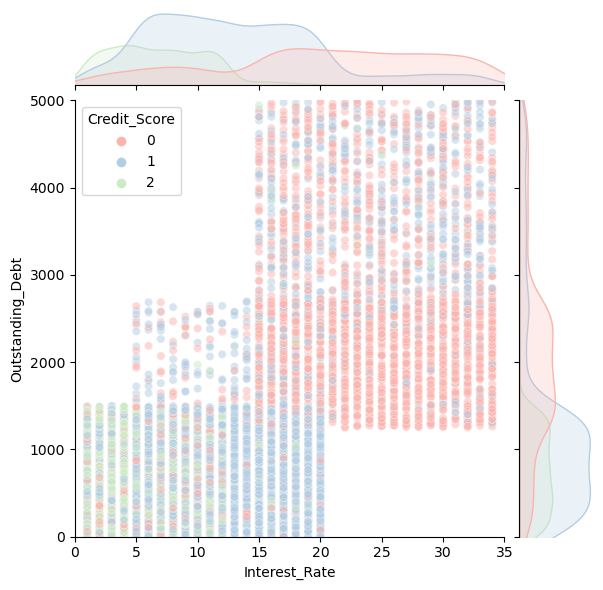

In [7]:
sns.jointplot(data=train, x="Interest_Rate", y="Outstanding_Debt", hue="Credit_Score", alpha=0.5, palette="Pastel1")
plt.xlim(0,35)
plt.ylim(0,5000)

## 3. Create Imbalanced Train Data Deliberately

In [8]:
train_0 = train[train['Credit_Score'] == 0]
train_1 = train[train['Credit_Score'] == 1]
train_2 = train[train['Credit_Score'] == 2]

In [9]:
train_0 = train_0.sample(frac=0.2)
train_2 = train_2.sample(frac=0.2)

In [10]:
train = pd.concat([train_0, train_1, train_2], axis=0)

(0.0, 5000.0)

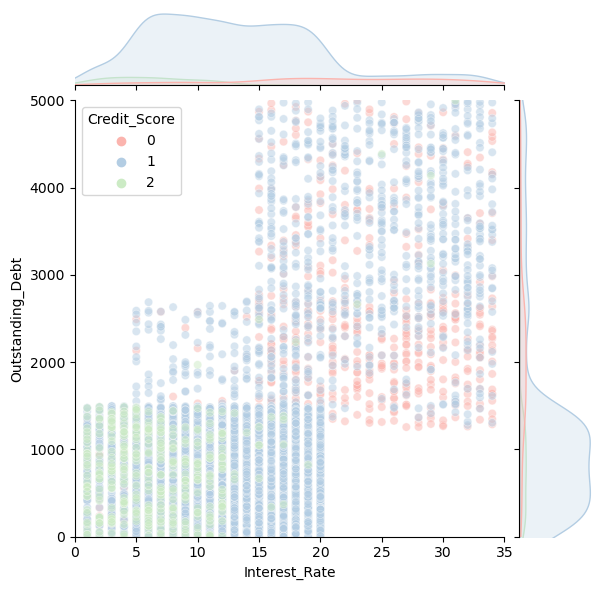

In [11]:
sns.jointplot(data=train, x="Interest_Rate", y="Outstanding_Debt", hue="Credit_Score", alpha=0.5, palette="Pastel1")
plt.xlim(0,35)
plt.ylim(0,5000)

In [12]:
x_columns = train.columns.tolist()
x_columns.remove('Credit_Score')
X_train = train[x_columns]
y_train = train['Credit_Score']

## 4. Define Data Transformer

In [13]:
from sklearn.preprocessing import LabelEncoder

class Data_Transformer(object):
    
    def fit(self, X, y=None):
        self.mean_age = X["Age"].mean()
        self.occu_le = LabelEncoder() # create label-encoder
        encoded_occupation = pd.Series(self.occu_le.fit_transform(X["Occupation"])) # fit and transform occupation with label-encoder
        self.majority_occupation = encoded_occupation.mode()[0] # obtain majority occupation code
        self.mean_annual_income = X["Annual_Income"].mean()
        self.mean_monthly_inhand_salary = X["Monthly_Inhand_Salary"].mean()
        self.mean_num_bank_accounts = X["Num_Bank_Accounts"].mean()
        self.mean_num_creadit_card = X["Num_Credit_Card"].mean()
        self.mean_num_interest_rate = X['Interest_Rate'].mean()
        self.mean_num_of_loan = X['Num_of_Loan'].mean()
        self.mean_delay_from_due_date = X['Delay_from_due_date'].mean()
        self.mean_num_of_delayed_payment = X['Num_of_Delayed_Payment'].mean()
        self.mean_changed_credit_limit = X['Changed_Credit_Limit'].mean()
        self.mean_num_credit_inquiries = X['Num_Credit_Inquiries'].mean()
        self.cm_le = LabelEncoder() # create label-encoder
        encoded_credit_mix = pd.Series(self.cm_le.fit_transform(X["Credit_Mix"])) # fit and transform credit mix with label-encoder
        self.majority_credit_mix = encoded_credit_mix.mode()[0] # obtain majority credit mix code
        self.mean_outstanding_debt = X['Outstanding_Debt'].mean()
        self.mean_credit_history_age = X['Credit_History_Age'].mean()
        self.pma_le = LabelEncoder() # create label-encoder
        encoded_payment_of_min_amount = pd.Series(self.pma_le.fit_transform(X["Payment_of_Min_Amount"])) # fit and transform payment of min amount with label-encoder
        self.majority_payment_of_min_amount = encoded_payment_of_min_amount.mode()[0] # obtain majority payment of min amount
        self.mean_total_EMI_per_month = X['Total_EMI_per_month'].mean()
        self.mean_amount_invested_monthly = X['Amount_invested_monthly'].mean()
        self.pb_le = LabelEncoder() # create label-encoder
        encoded_payment_behaviour = pd.Series(self.pb_le.fit_transform(X["Payment_Behaviour"])) # fit and transform payment behaviour with label-encoder
        self.majority_payment_behaviour = encoded_payment_behaviour.mode()[0] # obtain majority payment behaviour
        self.mean_monthly_balance = X['Monthly_Balance'].mean()
        
    def transform(self, X, y=None):
        new_df = pd.DataFrame()
        new_df["Age"] = X["Age"]
        new_df["Age"].fillna(self.mean_age,inplace=True)
        new_df["Occupation"] = self.occu_le.transform(X["Occupation"])
        new_df["Occupation"].fillna(self.majority_occupation,inplace=True)
        new_df["Annual_Income"] = X["Annual_Income"]
        new_df["Annual_Income"].fillna(self.mean_annual_income,inplace=True)
        new_df["Monthly_Inhand_Salary"] = X["Monthly_Inhand_Salary"]
        new_df["Monthly_Inhand_Salary"].fillna(self.mean_monthly_inhand_salary,inplace=True)
        new_df["Num_Bank_Accounts"] = X["Num_Bank_Accounts"]
        new_df["Num_Bank_Accounts"].fillna(self.mean_num_bank_accounts,inplace=True)
        new_df["Num_Credit_Card"] = X["Num_Credit_Card"]
        new_df["Num_Credit_Card"].fillna(self.mean_num_creadit_card,inplace=True)
        new_df["Interest_Rate"] = X["Interest_Rate"]
        new_df["Interest_Rate"].fillna(self.mean_num_interest_rate,inplace=True)
        new_df["Num_of_Loan"] = X["Num_of_Loan"]
        new_df["Num_of_Loan"].fillna(self.mean_num_of_loan,inplace=True)
        new_df["Delay_from_due_date"] = X["Delay_from_due_date"]
        new_df["Delay_from_due_date"].fillna(self.mean_delay_from_due_date,inplace=True)
        new_df["Num_of_Delayed_Payment"] = X["Num_of_Delayed_Payment"]
        new_df["Num_of_Delayed_Payment"].fillna(self.mean_num_of_delayed_payment,inplace=True)
        new_df["Changed_Credit_Limit"] = X["Changed_Credit_Limit"]
        new_df["Changed_Credit_Limit"].fillna(self.mean_changed_credit_limit,inplace=True)
        new_df["Num_Credit_Inquiries"] = X["Num_Credit_Inquiries"]
        new_df["Num_Credit_Inquiries"].fillna(self.mean_num_credit_inquiries,inplace=True)
        new_df["Credit_Mix"] = self.cm_le.transform(X["Credit_Mix"])
        new_df["Credit_Mix"].fillna(self.majority_credit_mix,inplace=True)
        new_df["Outstanding_Debt"] = X["Outstanding_Debt"]
        new_df["Outstanding_Debt"].fillna(self.mean_outstanding_debt,inplace=True)
        new_df["Credit_History_Age"] = X["Credit_History_Age"]
        new_df["Credit_History_Age"].fillna(self.mean_credit_history_age,inplace=True)
        new_df["Payment_of_Min_Amount"] = self.pma_le.transform(X["Payment_of_Min_Amount"])
        new_df["Payment_of_Min_Amount"].fillna(self.majority_payment_of_min_amount,inplace=True)
        new_df["Total_EMI_per_month"] = X["Total_EMI_per_month"]
        new_df["Total_EMI_per_month"].fillna(self.mean_total_EMI_per_month,inplace=True)
        new_df["Amount_invested_monthly"] = X["Amount_invested_monthly"]
        new_df["Amount_invested_monthly"].fillna(self.mean_amount_invested_monthly,inplace=True)
        new_df["Payment_Behaviour"] = self.pb_le.transform(X["Payment_Behaviour"])
        new_df["Payment_Behaviour"].fillna(self.majority_payment_behaviour,inplace=True)
        new_df["Monthly_Balance"] = X["Monthly_Balance"]
        new_df["Monthly_Balance"].fillna(self.mean_monthly_balance,inplace=True)
        return new_df
    
    def fit_transform(self, X, y=None):
        self.fit(X)
        return self.transform(X)

## 5. Train RandomForesfClassifier with the Imbalance Data

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [15]:
steps = [('dtf', Data_Transformer()),
        ('rfc', RandomForestClassifier())]
model = Pipeline(steps)

In [16]:
model.fit(X_train, y_train)

Pipeline(steps=[('dtf',
                 <__main__.Data_Transformer object at 0x000001433B05A090>),
                ('rfc', RandomForestClassifier())])

In [17]:
y_test_pred = model.predict(X_test)

In [18]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.91      0.55      0.68       822
           1       0.60      0.96      0.74      1217
           2       0.89      0.12      0.21       461

    accuracy                           0.67      2500
   macro avg       0.80      0.54      0.54      2500
weighted avg       0.76      0.67      0.62      2500



In [19]:
confusion_matrix(y_test,y_test_pred)

array([[ 451,  370,    1],
       [  44, 1167,    6],
       [   0,  407,   54]], dtype=int64)

In [20]:
from yellowbrick.classifier import ClassificationReport,ConfusionMatrix,ROCAUC

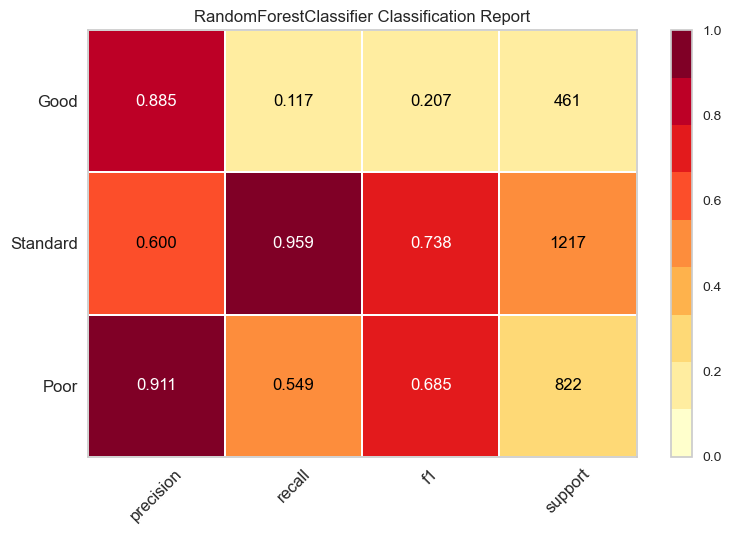

<Axes: title={'center': 'RandomForestClassifier Classification Report'}>

In [21]:
visualizer = ClassificationReport(model, classes=["Poor", "Standard", "Good"], support=True)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

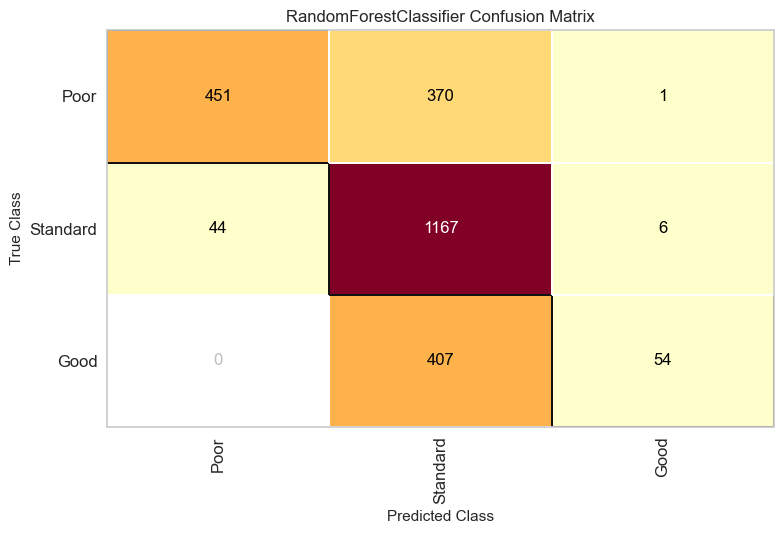

<Axes: title={'center': 'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [22]:
visualizer = ConfusionMatrix(model, classes=["Poor", "Standard", "Good"])
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

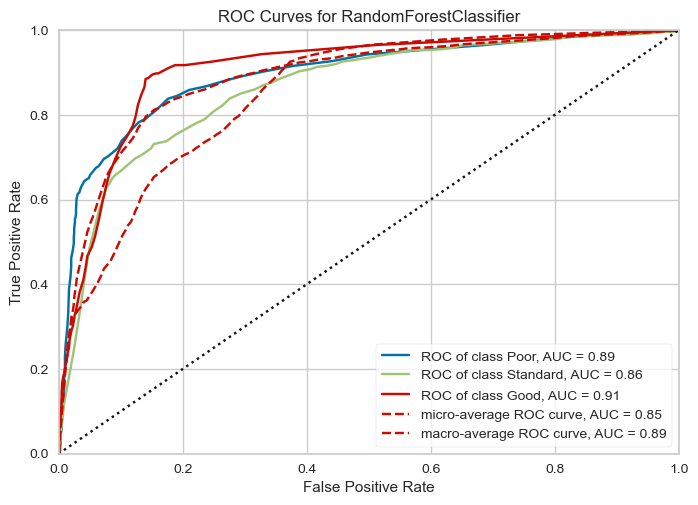

<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [23]:
visualizer = ROCAUC(model, classes=["Poor", "Standard", "Good"])
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

## 6. Train RandomForesfClassifier with the class_weight Hyperparameter Set "balanced" with the Imbalance Data

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [25]:
steps = [('dtf', Data_Transformer()),
        ('rfc', RandomForestClassifier(class_weight="balanced"))]
model = Pipeline(steps)

In [26]:
model.fit(X_train, y_train)

Pipeline(steps=[('dtf',
                 <__main__.Data_Transformer object at 0x000001433ADBB410>),
                ('rfc', RandomForestClassifier(class_weight='balanced'))])

In [27]:
y_test_pred = model.predict(X_test)

In [28]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.92      0.43      0.58       822
           1       0.57      0.97      0.72      1217
           2       0.84      0.06      0.11       461

    accuracy                           0.62      2500
   macro avg       0.78      0.49      0.47      2500
weighted avg       0.73      0.62      0.56      2500



In [29]:
confusion_matrix(y_test,y_test_pred)

array([[ 352,  470,    0],
       [  31, 1181,    5],
       [   0,  434,   27]], dtype=int64)

In [30]:
from yellowbrick.classifier import ClassificationReport,ConfusionMatrix,ROCAUC

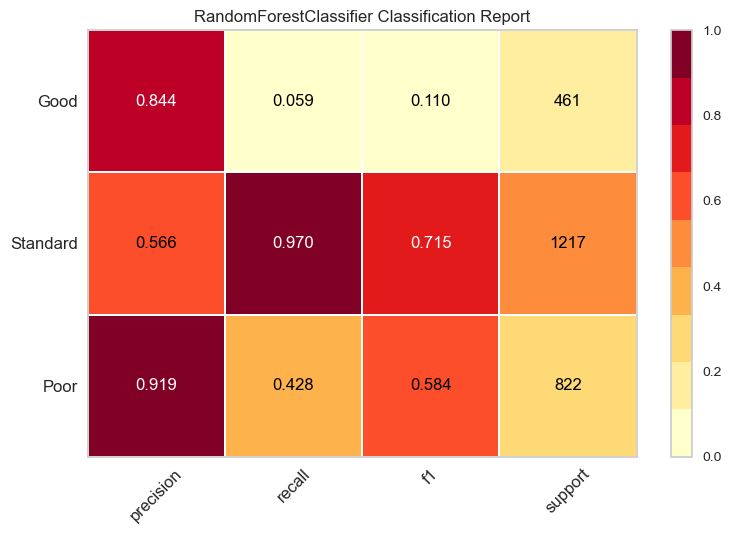

<Axes: title={'center': 'RandomForestClassifier Classification Report'}>

In [31]:
visualizer = ClassificationReport(model, classes=["Poor", "Standard", "Good"], support=True)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

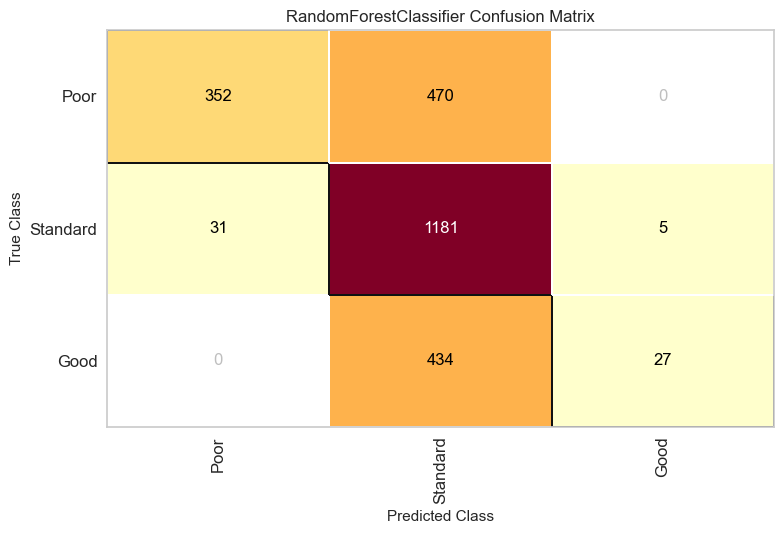

<Axes: title={'center': 'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [32]:
visualizer = ConfusionMatrix(model, classes=["Poor", "Standard", "Good"])
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

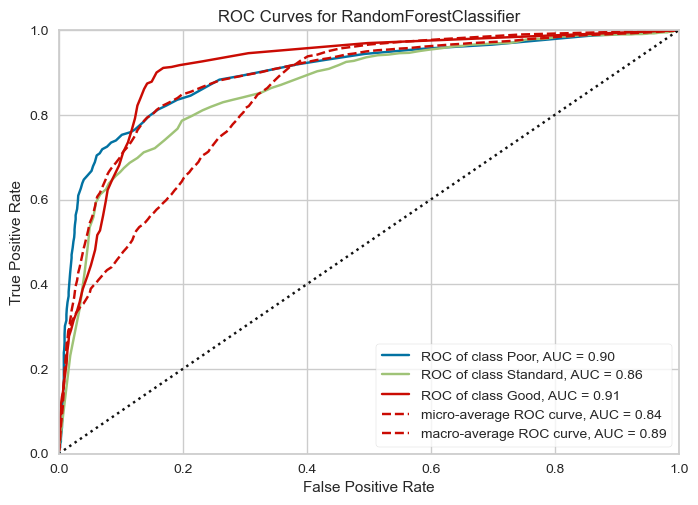

<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [33]:
visualizer = ROCAUC(model, classes=["Poor", "Standard", "Good"])
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

## 7. Train BalancedRandomForesfClassifier with the Imbalance Data

In [34]:
from sklearn.pipeline import Pipeline
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [35]:
steps = [('dtf', Data_Transformer()),
        ('brfc', BalancedRandomForestClassifier())]
model = Pipeline(steps)

In [36]:
model.fit(X_train, y_train)

c:\Users\fhan1\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
c:\Users\fhan1\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


Pipeline(steps=[('dtf',
                 <__main__.Data_Transformer object at 0x000001433DB2AB10>),
                ('brfc', BalancedRandomForestClassifier())])

In [37]:
y_test_pred = model.predict(X_test)

In [38]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.74      0.82      0.78       822
           1       0.88      0.65      0.75      1217
           2       0.59      0.89      0.71       461

    accuracy                           0.75      2500
   macro avg       0.74      0.78      0.74      2500
weighted avg       0.78      0.75      0.75      2500



In [39]:
confusion_matrix(y_test,y_test_pred)

array([[670,  65,  87],
       [226, 787, 204],
       [ 10,  40, 411]], dtype=int64)

In [40]:
from yellowbrick.classifier import ClassificationReport,ConfusionMatrix,ROCAUC

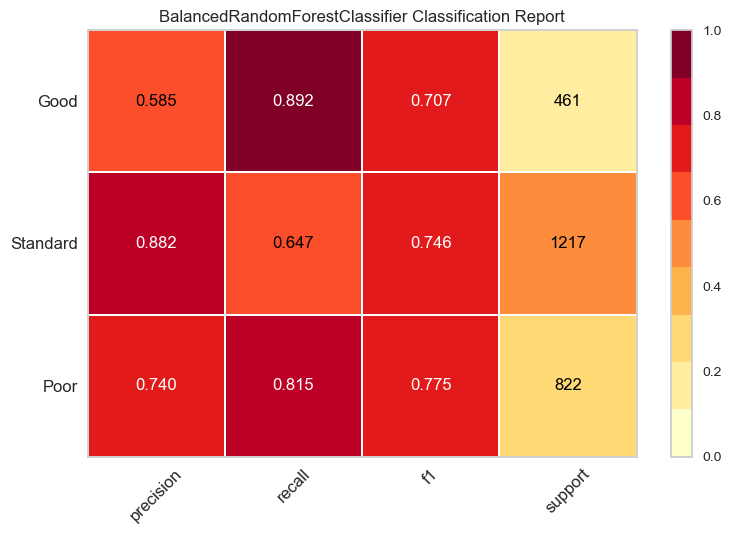

<Axes: title={'center': 'BalancedRandomForestClassifier Classification Report'}>

In [41]:
visualizer = ClassificationReport(model, classes=["Poor", "Standard", "Good"], support=True)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

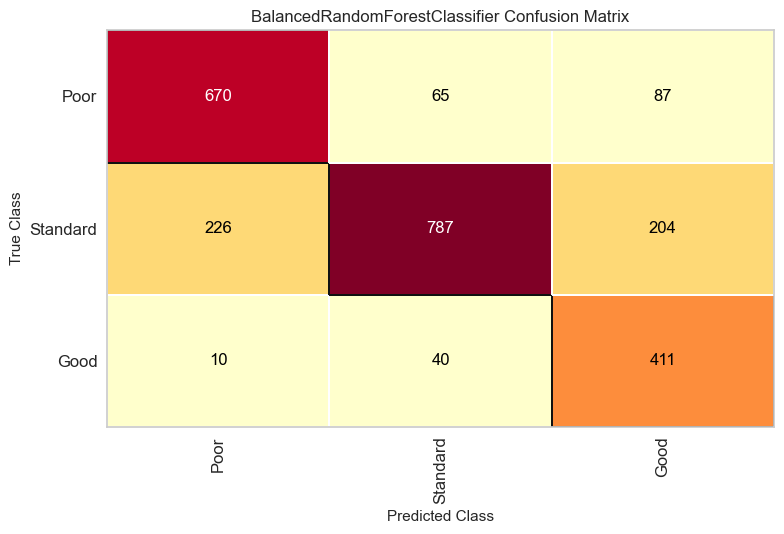

<Axes: title={'center': 'BalancedRandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [42]:
visualizer = ConfusionMatrix(model, classes=["Poor", "Standard", "Good"])
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

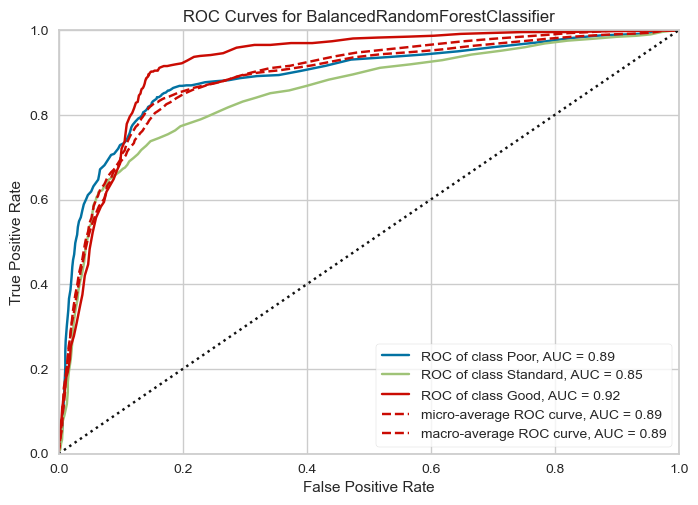

<Axes: title={'center': 'ROC Curves for BalancedRandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [43]:
visualizer = ROCAUC(model, classes=["Poor", "Standard", "Good"])
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

## 8. Tune Hyperparamters of RandomForesfClassifier with the Macro-averaged F1-score as a Metric

In [44]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score, classification_report, confusion_matrix

In [45]:
steps = [('dtf', Data_Transformer()),
        ('rfc', RandomForestClassifier(n_jobs=-1))]
model = Pipeline(steps)
param_grid = {'rfc__max_depth': [2, 5, 10, 20, 30, 50, 70, 100, 130, 170, 210], 
              'rfc__min_samples_leaf': [1, 2, 3, 4, 5, 7, 10, 13, 17, 21, 26, 31]}
model_gsv = GridSearchCV(model, param_grid, cv=2, scoring=make_scorer(f1_score, average='macro', greater_is_better=True))

In [46]:
model_gsv.fit(X_train, y_train)

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('dtf',
                                        <__main__.Data_Transformer object at 0x000001433E712390>),
                                       ('rfc',
                                        RandomForestClassifier(n_jobs=-1))]),
             param_grid={'rfc__max_depth': [2, 5, 10, 20, 30, 50, 70, 100, 130,
                                            170, 210],
                         'rfc__min_samples_leaf': [1, 2, 3, 4, 5, 7, 10, 13, 17,
                                                   21, 26, 31]},
             scoring=make_scorer(f1_score, average=macro))

In [47]:
model_gsv.best_params_

{'rfc__max_depth': 130, 'rfc__min_samples_leaf': 1}

In [48]:
result = model_gsv.cv_results_
result = pd.DataFrame(result)[['param_rfc__max_depth', 'param_rfc__min_samples_leaf',  'mean_test_score', 'rank_test_score']]
result

,param_rfc__max_depth,param_rfc__min_samples_leaf,mean_test_score,rank_test_score
0,2,1,0.303808,121
1,2,2,0.301847,124
2,2,3,0.302833,123
3,2,4,0.301813,131
4,2,5,0.303808,121
...,...,...,...,...
127,210,13,0.468924,67
128,210,17,0.457639,73
129,210,21,0.435829,96
130,210,26,0.430766,100


In [49]:
y_test_pred = model_gsv.predict(X_test)

In [50]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.91      0.54      0.67       822
           1       0.60      0.96      0.74      1217
           2       0.86      0.11      0.20       461

    accuracy                           0.66      2500
   macro avg       0.79      0.54      0.54      2500
weighted avg       0.75      0.66      0.62      2500



In [51]:
confusion_matrix(y_test,y_test_pred)

array([[ 440,  380,    2],
       [  42, 1169,    6],
       [   1,  409,   51]], dtype=int64)

In [52]:
from yellowbrick.classifier import ClassificationReport,ConfusionMatrix,ROCAUC

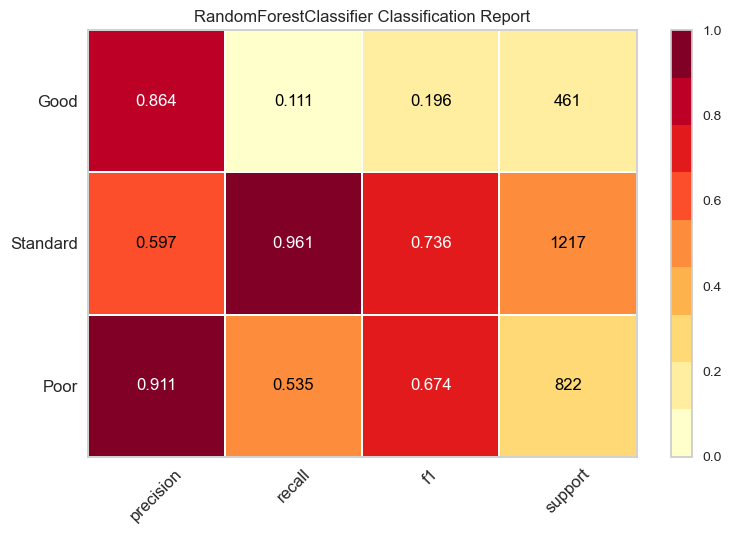

<Axes: title={'center': 'RandomForestClassifier Classification Report'}>

In [53]:
model = model_gsv.best_estimator_
visualizer = ClassificationReport(model, classes=["Poor", "Standard", "Good"], support=True)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

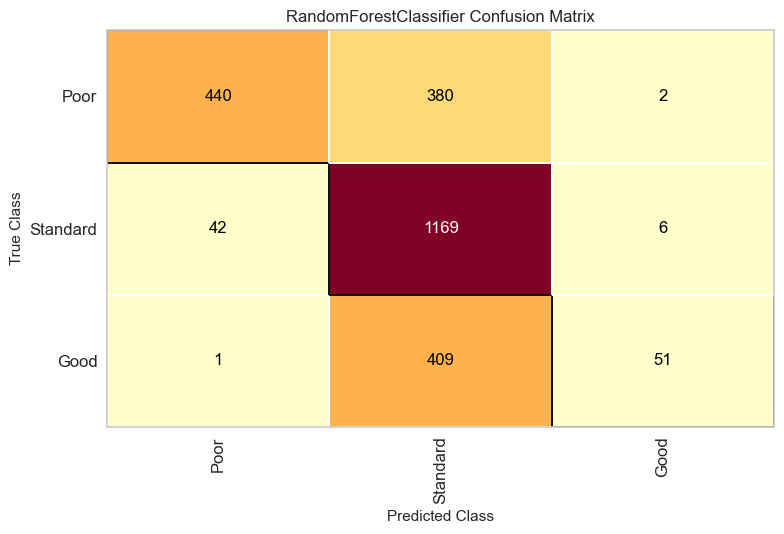

<Axes: title={'center': 'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [54]:
model = model_gsv.best_estimator_
visualizer = ConfusionMatrix(model, classes=["Poor", "Standard", "Good"])
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

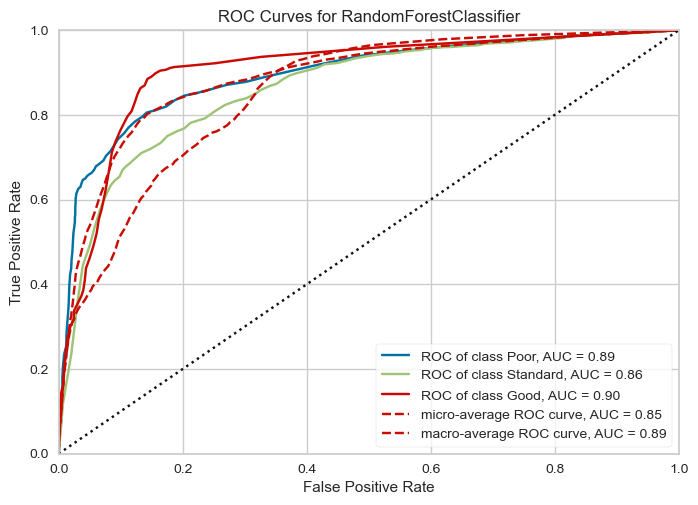

<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [55]:
model = model_gsv.best_estimator_
visualizer = ROCAUC(model, classes=["Poor", "Standard", "Good"])
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

## 9. Tune Hyperparamters of BalancedRandomForesfClassifier with the Macro-averaged F1-score as a Metric

In [56]:
from sklearn.pipeline import Pipeline
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score, classification_report, confusion_matrix

In [57]:
steps = [('dtf', Data_Transformer()),
        ('brfc', BalancedRandomForestClassifier(n_jobs=-1))]
model = Pipeline(steps)
param_grid = {'brfc__max_depth': [2, 5, 10, 20, 30, 50, 70, 100, 130, 170, 210], 
              'brfc__min_samples_leaf': [1, 2, 3, 4, 5, 7, 10, 13, 17, 21, 26, 31]}
model_gsv = GridSearchCV(model, param_grid, cv=2, scoring=make_scorer(f1_score, average='macro', greater_is_better=True))

In [58]:
model_gsv.fit(X_train, y_train)

c:\Users\fhan1\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
c:\Users\fhan1\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
c:\Users\fhan1\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
c:\U

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('dtf',
                                        <__main__.Data_Transformer object at 0x000001433EAB5ED0>),
                                       ('brfc',
                                        BalancedRandomForestClassifier(n_jobs=-1))]),
             param_grid={'brfc__max_depth': [2, 5, 10, 20, 30, 50, 70, 100, 130,
                                             170, 210],
                         'brfc__min_samples_leaf': [1, 2, 3, 4, 5, 7, 10, 13,
                                                    17, 21, 26, 31]},
             scoring=make_scorer(f1_score, average=macro))

In [59]:
model_gsv.best_params_

{'brfc__max_depth': 170, 'brfc__min_samples_leaf': 1}

In [60]:
result = model_gsv.cv_results_
result = pd.DataFrame(result)[['param_brfc__max_depth', 'param_brfc__min_samples_leaf',  'mean_test_score', 'rank_test_score']]
result

,param_brfc__max_depth,param_brfc__min_samples_leaf,mean_test_score,rank_test_score
0,2,1,0.547046,115
1,2,2,0.551744,94
2,2,3,0.540897,125
3,2,4,0.532640,129
4,2,5,0.539915,127
...,...,...,...,...
127,210,13,0.555608,56
128,210,17,0.553326,82
129,210,21,0.552157,90
130,210,26,0.545084,121


In [61]:
y_test_pred = model_gsv.predict(X_test)

In [62]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.74      0.81      0.77       822
           1       0.88      0.65      0.75      1217
           2       0.59      0.89      0.71       461

    accuracy                           0.75      2500
   macro avg       0.74      0.78      0.74      2500
weighted avg       0.78      0.75      0.75      2500



In [63]:
confusion_matrix(y_test,y_test_pred)

array([[665,  69,  88],
       [221, 793, 203],
       [ 10,  40, 411]], dtype=int64)

In [64]:
from yellowbrick.classifier import ClassificationReport,ConfusionMatrix,ROCAUC

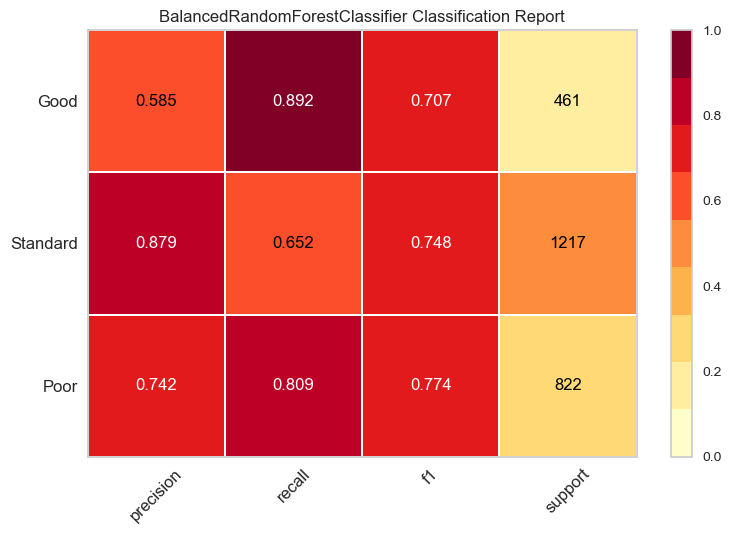

<Axes: title={'center': 'BalancedRandomForestClassifier Classification Report'}>

In [65]:
model = model_gsv.best_estimator_
visualizer = ClassificationReport(model, classes=["Poor", "Standard", "Good"], support=True)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

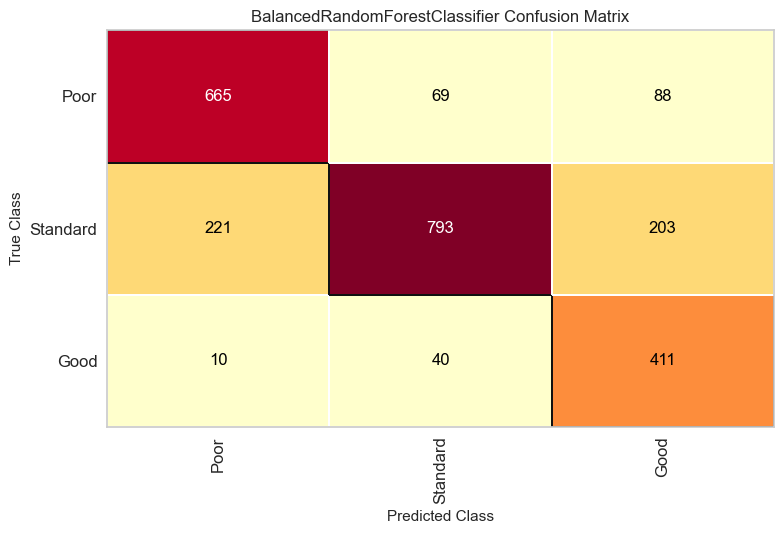

<Axes: title={'center': 'BalancedRandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [66]:
model = model_gsv.best_estimator_
visualizer = ConfusionMatrix(model, classes=["Poor", "Standard", "Good"])
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

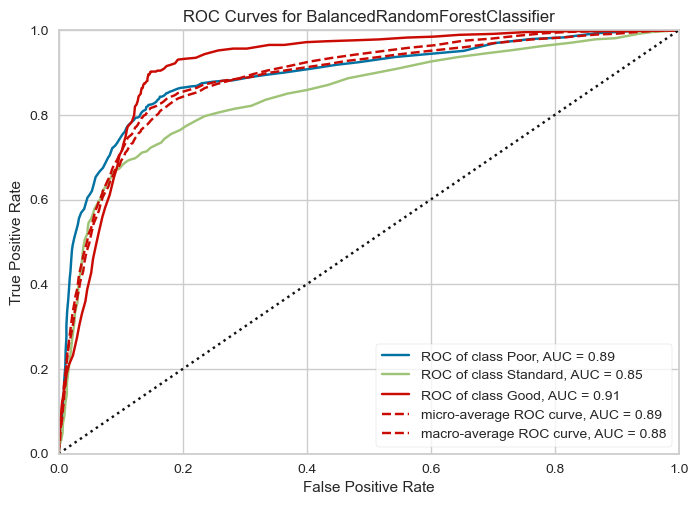

<Axes: title={'center': 'ROC Curves for BalancedRandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [67]:
model = model_gsv.best_estimator_
visualizer = ROCAUC(model, classes=["Poor", "Standard", "Good"])
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()